# 一. 数据分析

## 数据下载和加载

In [2]:
#导入相关的数据包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 特征说明
![apachecn](https://github.com/apachecn/kaggle/blob/dev/static/images/competitions/getting-started/house-price/%E6%88%BF%E4%BB%B7%E9%A2%84%E6%B5%8B-%E5%AD%97%E6%AE%B5%E8%AF%B4%E6%98%8E.png?raw=true)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 特征详情

In [6]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 特征分析（统计学与绘图）

每一行是一条房子出售的记录，原始特征有80列，具体的意思可以根据data_description来查询，我们要预测的是房子的售价，即“SalePrice”。训练集有1459条记录，测试集有1460条记录，数据量还是很小的。

In [7]:
# 相关性协方差表,corr()函数,返回结果接近0说明无相关性,大于0说明是正相关,小于0是负相关.
train_corr = train.drop('Id',axis=1).corr()
train_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [8]:
train_corr['SalePrice']

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

> 所有特征相关度分析

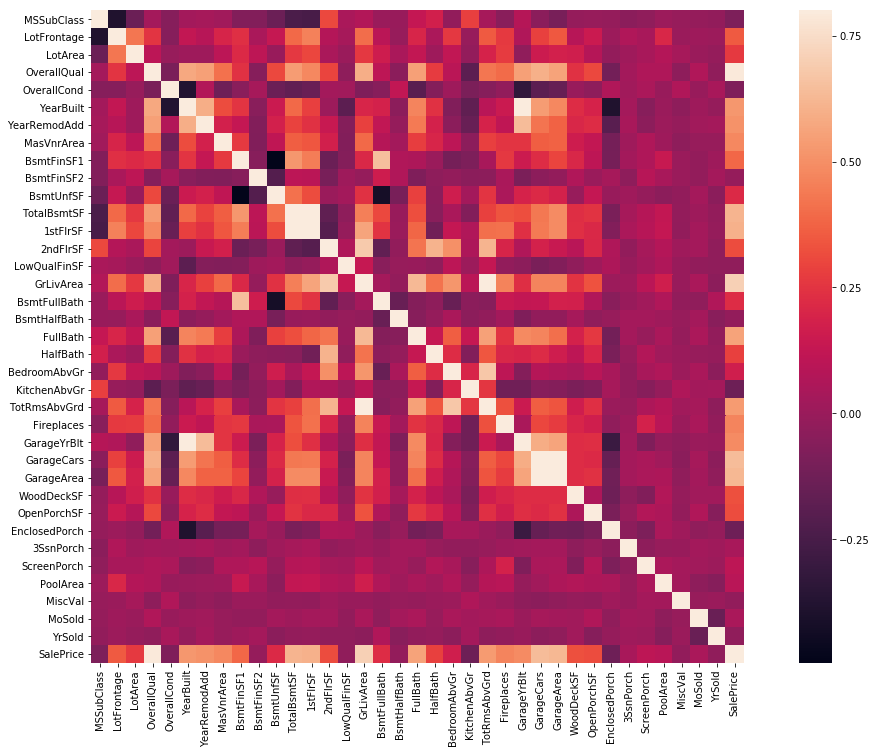

In [9]:
#画出相关性热力图
a = plt.subplots(figsize=(20, 12))#调整画布大小
a = sns.heatmap(train_corr, vmax=.8, square=True)#画热力图  annot=True 显示系数,vmax调整颜色深度

> SalePrice相关度特征排序

In [10]:
train_corr.shape

(37, 37)

In [11]:
# 寻找k个最相关的特征信息
k = 10 #number of bariables for heatmap
cols = train_corr.nlargest(k, 'SalePrice')
cols

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,-0.035227,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [12]:
cols = cols['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

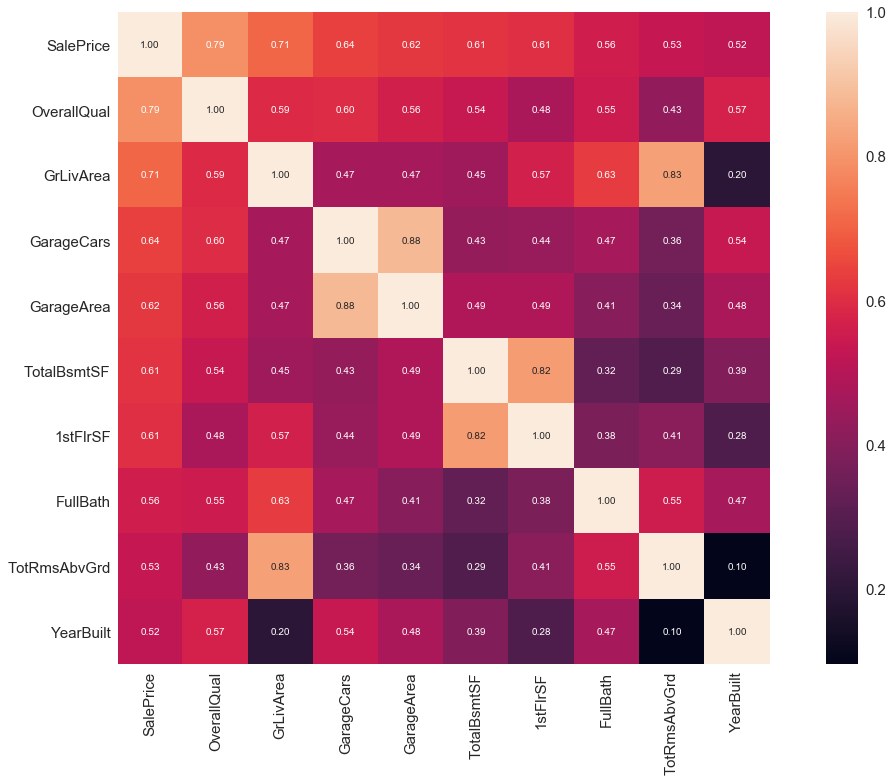

In [13]:
cm = np.corrcoef(train[cols].values.T)#对前十相关特征，计算协方差
sns.set(font_scale=1.5)#字体大小
hm = plt.subplots(figsize=(20,12))#调整画布大小
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


'''
1. GarageCars 和 GarageAre 相关性很高、就像双胞胎一样，所以我们只需要其中的一个变量，例如：GarageCars。
2. TotalBsmtSF  和 1stFloor 与上述情况相同，我们选择 TotalBsmtS
3. GarageAre 和 TotRmsAbvGrd 与上述情况相同，我们选择 GarageAre
''' 

> SalePrice 和相关变量之间的散点图

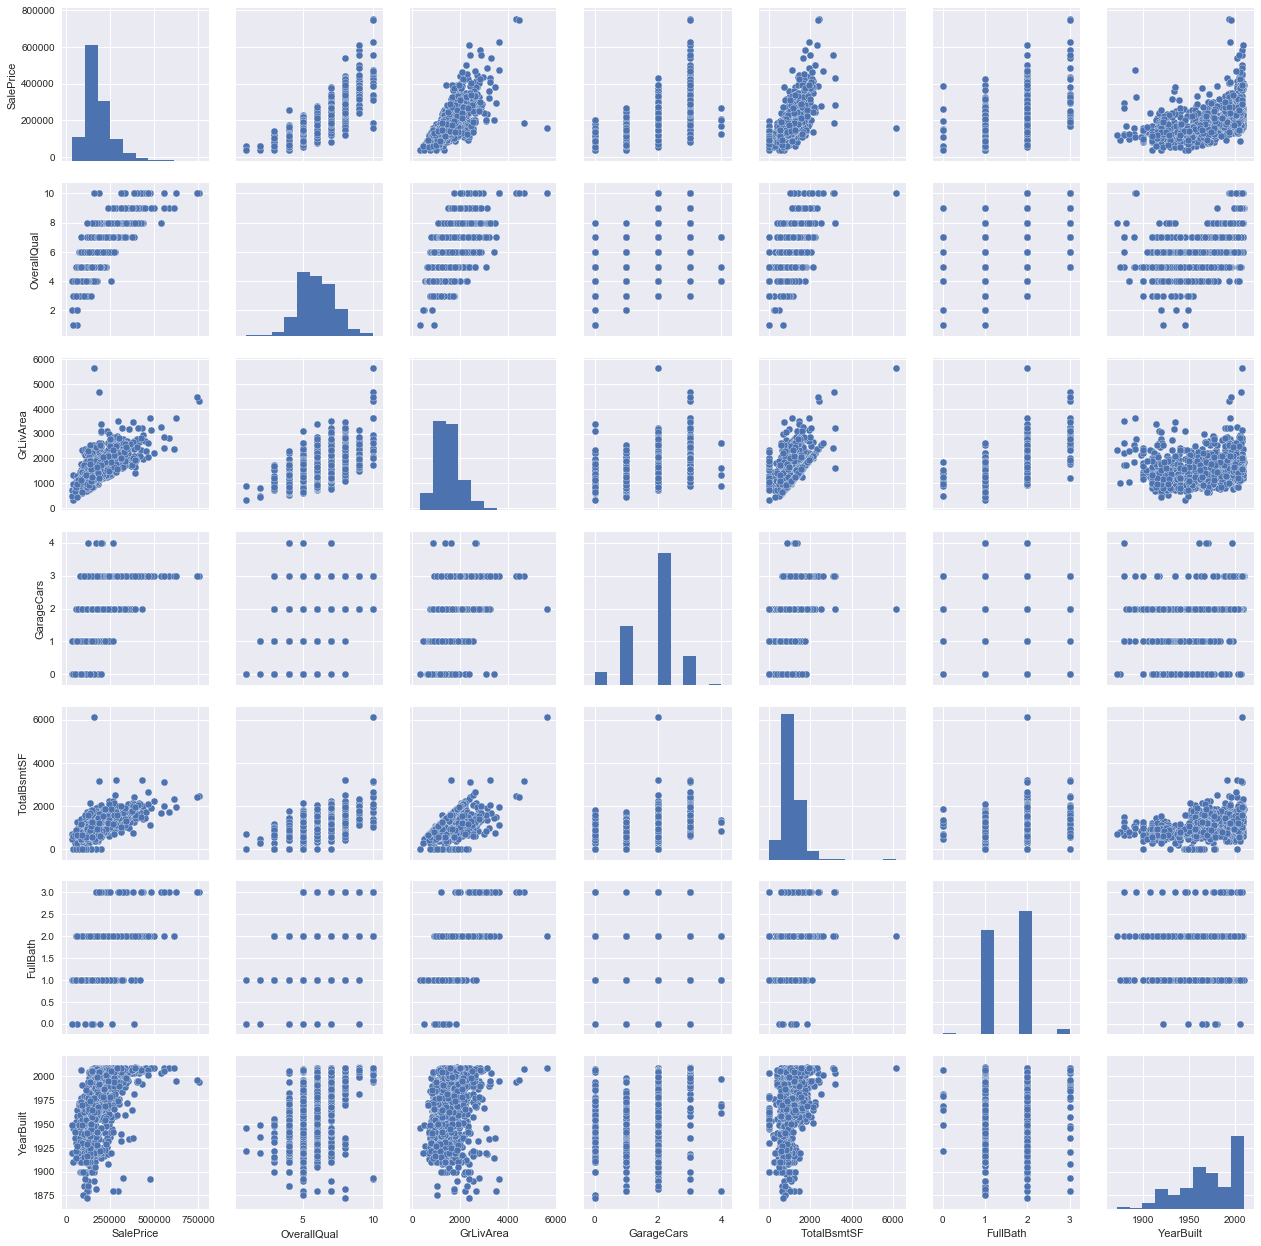

In [14]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

In [15]:
train[['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
SalePrice      1460 non-null int64
OverallQual    1460 non-null int64
GrLivArea      1460 non-null int64
GarageCars     1460 non-null int64
TotalBsmtSF    1460 non-null int64
FullBath       1460 non-null int64
YearBuilt      1460 non-null int64
dtypes: int64(7)
memory usage: 79.9 KB


# 二. 特征工程

In [16]:
test['SalePrice'] = None
train_test = pd.concat((train, test)).reset_index(drop=True)

### 1.缺失值分析
2.根据业务,常识,以及第二步的数据分析构造特征工程.<br>
3.将特征转换为模型可以辨别的类型(如处理缺失值,处理文本进行等)

In [17]:
total = train_test.isnull().sum(axis=0).sort_values(ascending=False)
total

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Utilities           2
Functional          2
BsmtFullBath        2
BsmtHalfBath        2
GarageArea          1
BsmtFinSF2          1
Exterior1st         1
TotalBsmtSF         1
GarageCars          1
BsmtUnfSF           1
                 ... 
LotConfig           0
Neighborhood        0
HeatingQC           0
ExterQual           0
TotRmsAbvGrd        0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive

In [18]:
train_test.isnull().count()

Id               2919
MSSubClass       2919
MSZoning         2919
LotFrontage      2919
LotArea          2919
Street           2919
Alley            2919
LotShape         2919
LandContour      2919
Utilities        2919
LotConfig        2919
LandSlope        2919
Neighborhood     2919
Condition1       2919
Condition2       2919
BldgType         2919
HouseStyle       2919
OverallQual      2919
OverallCond      2919
YearBuilt        2919
YearRemodAdd     2919
RoofStyle        2919
RoofMatl         2919
Exterior1st      2919
Exterior2nd      2919
MasVnrType       2919
MasVnrArea       2919
ExterQual        2919
ExterCond        2919
Foundation       2919
                 ... 
BedroomAbvGr     2919
KitchenAbvGr     2919
KitchenQual      2919
TotRmsAbvGrd     2919
Functional       2919
Fireplaces       2919
FireplaceQu      2919
GarageType       2919
GarageYrBlt      2919
GarageFinish     2919
GarageCars       2919
GarageArea       2919
GarageQual       2919
GarageCond       2919
PavedDrive

In [19]:
percent = (train_test.isnull().sum()/train_test.isnull().count()).sort_values(ascending=False)

In [20]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Lost Percent'])

In [21]:
missing_data.head()

,Total,Lost Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829


In [22]:
missing_data.isnull()

,Total,Lost Percent
PoolQC,False,False
MiscFeature,False,False
Alley,False,False
Fence,False,False
SalePrice,False,False
FireplaceQu,False,False
LotFrontage,False,False
GarageQual,False,False
GarageYrBlt,False,False
GarageFinish,False,False


In [23]:
print(missing_data[missing_data.isnull()])

               Total  Lost Percent
PoolQC           NaN           NaN
MiscFeature      NaN           NaN
Alley            NaN           NaN
Fence            NaN           NaN
SalePrice        NaN           NaN
FireplaceQu      NaN           NaN
LotFrontage      NaN           NaN
GarageQual       NaN           NaN
GarageYrBlt      NaN           NaN
GarageFinish     NaN           NaN
GarageCond       NaN           NaN
GarageType       NaN           NaN
BsmtExposure     NaN           NaN
BsmtCond         NaN           NaN
BsmtQual         NaN           NaN
BsmtFinType2     NaN           NaN
BsmtFinType1     NaN           NaN
MasVnrType       NaN           NaN
MasVnrArea       NaN           NaN
MSZoning         NaN           NaN
Utilities        NaN           NaN
Functional       NaN           NaN
BsmtFullBath     NaN           NaN
BsmtHalfBath     NaN           NaN
GarageArea       NaN           NaN
BsmtFinSF2       NaN           NaN
Exterior1st      NaN           NaN
TotalBsmtSF      NaN

In [24]:
missing_data[missing_data.isnull().values==False]#这样去除了全为空的值

,Total,Lost Percent
PoolQC,2909,0.996574
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
MiscFeature,2814,0.964029
Alley,2721,0.932169
Alley,2721,0.932169
Fence,2348,0.804385
Fence,2348,0.804385
SalePrice,1459,0.499829
SalePrice,1459,0.499829


In [25]:
print(missing_data[missing_data.isnull().values==False].sort_values('Total',axis=0, ascending=False).head(20))

              Total  Lost Percent
PoolQC         2909      0.996574
PoolQC         2909      0.996574
MiscFeature    2814      0.964029
MiscFeature    2814      0.964029
Alley          2721      0.932169
Alley          2721      0.932169
Fence          2348      0.804385
Fence          2348      0.804385
SalePrice      1459      0.499829
SalePrice      1459      0.499829
FireplaceQu    1420      0.486468
FireplaceQu    1420      0.486468
LotFrontage     486      0.166495
LotFrontage     486      0.166495
GarageFinish    159      0.054471
GarageCond      159      0.054471
GarageCond      159      0.054471
GarageFinish    159      0.054471
GarageQual      159      0.054471
GarageYrBlt     159      0.054471


'''
1. 对于缺失率过高的特征，例如 超过15% 我们应该删掉相关变量且假设该变量并不存在
2. GarageX 变量群的缺失数据量和概率都相同，可以选择一个就行，例如：GarageCars
3. 对于缺失数据在5%左右（缺失率低），可以直接删除/回归预测
'''

In [26]:
#删去存在缺失值的特征
train_test = train_test.drop((missing_data[missing_data['Total'] > 1]).index.drop('SalePrice'), axis=1)
#train_test = train_test.drop(train.loc[train['Electrical].isnull()].index)

#tmp--房价没有缺失的
tmp = train_test[train_test['SalePrice'].isnull().values==False]
#为了检查没有遗落每一个missing_data
print(tmp.isnull().sum().max())

1


### 2.异常值处理

由于字太多，详情见[此](https://github.com/apachecn/kaggle/tree/dev/competitions/getting-started/house-price)，不展开啦

#### 单因素分析

这里的关键在于如何建立阈值，定义一个观察值为异常值。我们对数据进行正态化，意味着把数据值转换成均值为 0，方差为 1 的数据

Skewness: 1.882876
Kurtosis: 6.536282


'\n低范围的值都比较相似并且在 0 附近分布。\n高范围的值离 0 很远，并且七点几的值远在正常范围之外。\n'

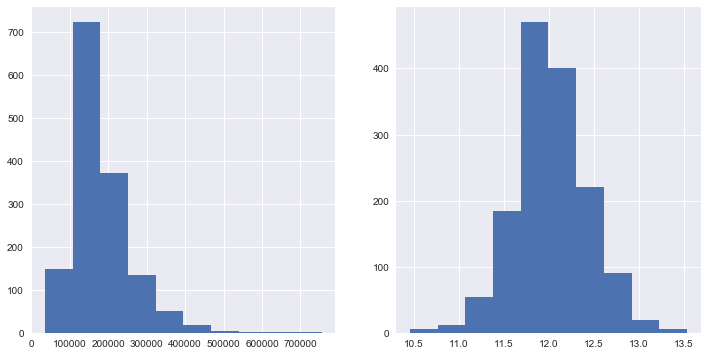

In [27]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(train.SalePrice)
ax2.hist(np.log1p(train.SalePrice))
'''
从直方图中可以看出：

* 偏离正态分布
* 数据正偏
* 有峰值
'''
# 数据偏度和峰度度量

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())
'''
低范围的值都比较相似并且在 0 附近分布。
高范围的值离 0 很远，并且七点几的值远在正常范围之外。
'''

#### 双变量分析

> GrLivArea 和 SalePrice 双变量分析

'\n从图中可以看出：\n\n1. 有两个离群的 GrLivArea 值很高的数据，我们可以推测出现这种情况的原因。\n    或许他们代表了农业地区，也就解释了低价。 这两个点很明显不能代表典型样例，所以我们将它们定义为异常值并删除。\n2. 图中顶部的两个点是七点几的观测值，他们虽然看起来像特殊情况，但是他们依然符合整体趋势，所以我们将其保留下来。\n'

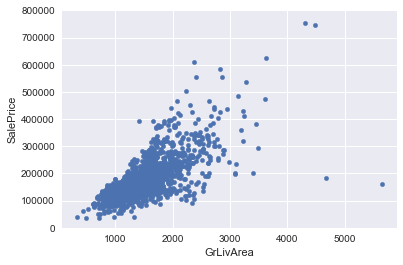

In [28]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
'''
从图中可以看出：

1. 有两个离群的 GrLivArea 值很高的数据，我们可以推测出现这种情况的原因。
    或许他们代表了农业地区，也就解释了低价。 这两个点很明显不能代表典型样例，所以我们将它们定义为异常值并删除。
2. 图中顶部的两个点是七点几的观测值，他们虽然看起来像特殊情况，但是他们依然符合整体趋势，所以我们将其保留下来。
'''

In [29]:
#删除点
print(train.sort_values(by='GrLivArea', ascending = False)[:2])
temp = train_test[train_test['SalePrice'].isnull().values==False]

train_test = train_test.drop(tmp[tmp['Id'] == 1299].index)
train_test = train_test.drop(tmp[tmp['Id'] == 524].index)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
523    524          60       RL        130.0    40094   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1298         Bnk    AllPub    ...          480     Gd   NaN         NaN   
523          Bnk    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298       0      1   2008       New        Partial     160000  
523        0     10   2007       New        Partial     184750  

[2 rows x 81 columns]


> TotalBsmtSF 和 SalePrice双变量分析

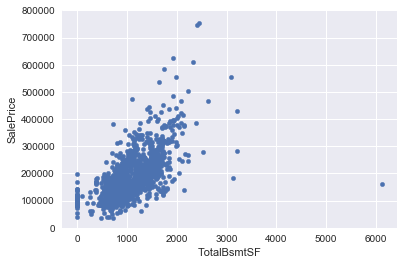

In [30]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

### 核心部分
“房价” 到底是谁？

这个问题的答案，需要我们验证根据数据基础进行多元分析的假设。

我们已经进行了数据清洗，并且发现了 SalePrice 的很多信息，现在我们要更进一步理解 SalePrice 如何遵循统计假设，可以让我们应用多元技术。

应该测量 4 个假设量：

- 正态性
- 同方差性
- 线性
- 相关错误缺失

#### 正态性：

应主要关注以下两点：直方图 – 峰度和偏度。

正态概率图 – 数据分布应紧密跟随代表正态分布的对角线。

1.SalePrice 绘制直方图和正态概率图：

'\n可以看出，房价分布不是正态的，显示了峰值，正偏度，但是并不跟随对角线。\n可以用对数变换来解决这个问题\n'

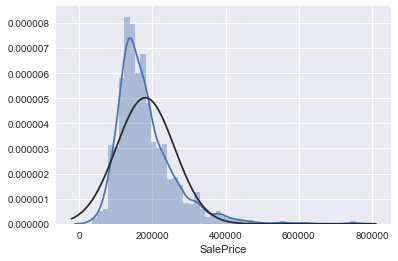

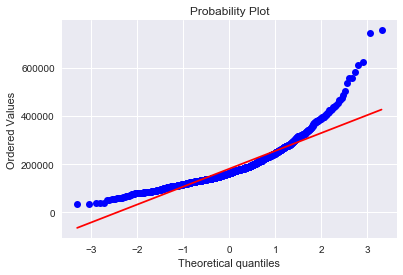

In [31]:
#fit：控制拟合的参数分布图形，能够直观地评估它与观察数据的对应关系(黑色线条为确定的分布)
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
#Theoretical quantiles理论分位数
#Ordered Values有序值
#stats.probplot计算概率图的分位数，并可选择显示图
'''
可以看出，房价分布不是正态的，显示了峰值，正偏度，但是并不跟随对角线。
可以用对数变换来解决这个问题
'''

In [32]:
#进行对数变换
#进行对数变换
train_test['SalePrice'] = [i if i is None else np.log1p(i) for i in train_test['SalePrice']]

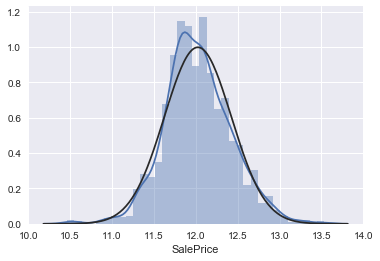

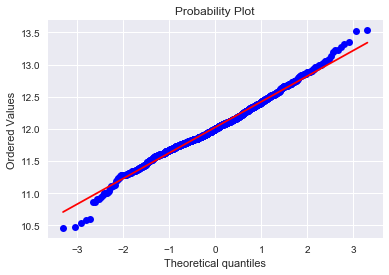

In [33]:
#绘制变换后的直方图和正态概率图
tmp = train_test[train_test['SalePrice'].isnull().values==False]

sns.distplot(tmp[tmp['SalePrice'] != 0]['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(tmp['SalePrice'], plot=plt)

#### 2.GrLivArea

绘制直方图和正态概率曲线图：

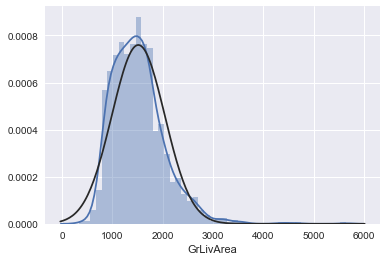

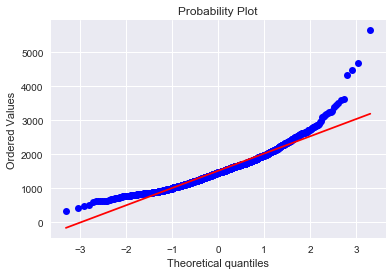

In [34]:
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

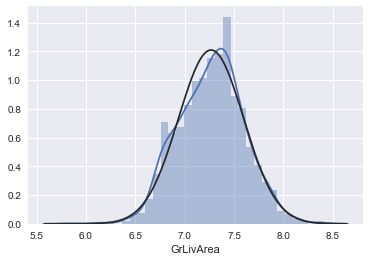

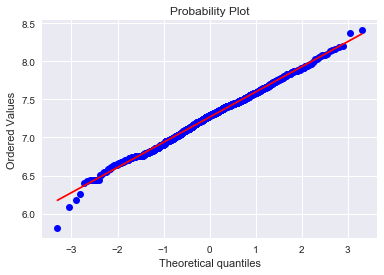

In [35]:
#进行对数变换
train_test["GrLivArea"] = [i if i is None else np.log1p(i) for i in train_test['GrLivArea']] 

# 绘制变换后的直方图和正态概率图
tmp = train_test[train_test['SalePrice'].isnull().values==False]
sns.distplot(tmp['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(tmp['GrLivArea'], plot=plt)

#### 3.TotalBsmtSF

绘制直方图和正态概率曲线图

'\n从图中可以看出：\n* 显示出了偏度\n* 大量为 0(Y值) 的观察值（没有地下室的房屋）\n* 含 0(Y值) 的数据无法进行对数变换\n'

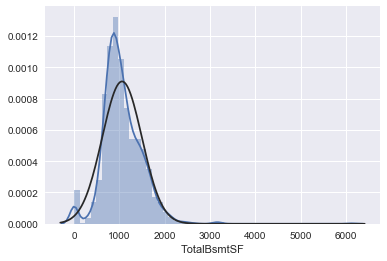

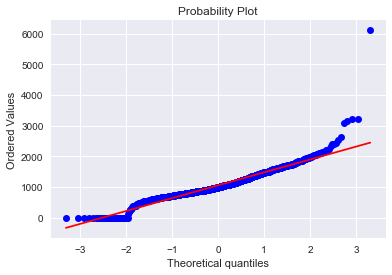

In [36]:
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

'''
从图中可以看出：
* 显示出了偏度
* 大量为 0(Y值) 的观察值（没有地下室的房屋）
* 含 0(Y值) 的数据无法进行对数变换
'''

In [37]:
#去掉为0的分布情况
tmp = train_test[train_test['SalePrice'].isnull().values==False]

tmp = np.array(tmp.loc[tmp['TotalBsmtSF']>0, ['TotalBsmtSF']])
print(tmp.shape)
tmp = tmp[:,0]
print(tmp.shape)

(1421, 1)
(1421,)


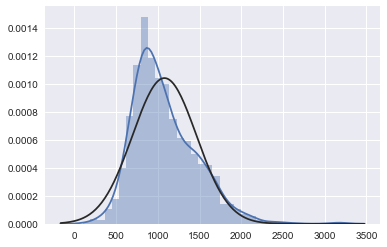

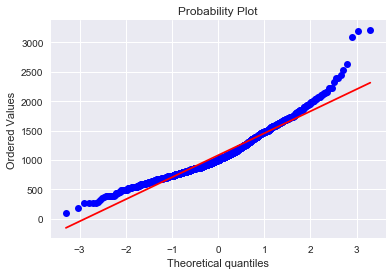

In [38]:
sns.distplot(tmp, fit=norm)
fig = plt.figure()
res = stats.probplot(tmp, plot=plt)

In [39]:
# 我们建立了一个变量，可以得到有没有地下室的影响值（二值变量），我们选择忽略零值，只对非零值进行对数变换。
# 这样我们既可以变换数据，也不会损失有没有地下室的影响。

print(train.loc[train['TotalBsmtSF']==0, ['TotalBsmtSF']].count())
train.loc[train['TotalBsmtSF']==0,'TotalBsmtSF'] = 1
print(train.loc[train['TotalBsmtSF']==1, ['TotalBsmtSF']].count())

TotalBsmtSF    37
dtype: int64
TotalBsmtSF    37
dtype: int64


In [40]:
#进行对数变换
tmp = train_test[train_test['SalePrice'].isnull().values==False]

print(tmp['TotalBsmtSF'].head(10))
train_test['TotalBsmtSF'] = np.log1p(train_test['TotalBsmtSF'])

tmp = train_test[train_test['SalePrice'].isnull().values==False]
print(tmp['TotalBsmtSF'].head(10))

0     856.0
1    1262.0
2     920.0
3     756.0
4    1145.0
5     796.0
6    1686.0
7    1107.0
8     952.0
9     991.0
Name: TotalBsmtSF, dtype: float64
0    6.753438
1    7.141245
2    6.825460
3    6.629363
4    7.044033
5    6.680855
6    7.430707
7    7.010312
8    6.859615
9    6.899723
Name: TotalBsmtSF, dtype: float64


In [41]:
#test
np.log1p([856])

array([6.75343792])

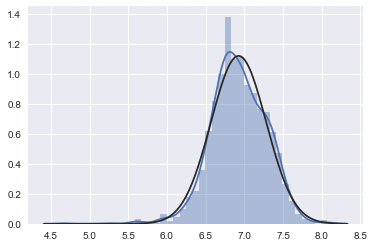

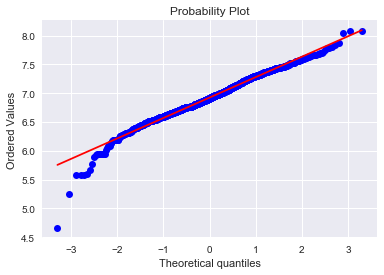

In [42]:
#绘制变换后的直方图和正态概率图
tmp = train_test[train_test['SalePrice'].isnull().values==False]
#去非零
tmp = np.array(tmp.loc[tmp['TotalBsmtSF']>0, ['TotalBsmtSF']])[:, 0]
sns.distplot(tmp, fit=norm)
fig = plt.figure()
res = stats.probplot(tmp, plot=plt)

#### 同方差性：
最好的测量两个变量的同方差性的方法就是图像。

1.SalePrice 和 GrLivArea 同方差性<br>
绘制散点图：

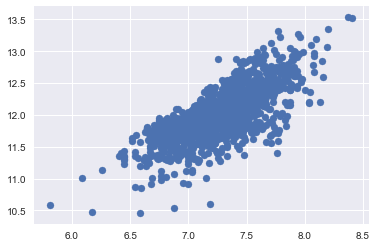

In [43]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]

plt.scatter(tmp['GrLivArea'], tmp['SalePrice'])

2.SalePrice with TotalBsmtSF 同方差性<br>
绘制散点图：

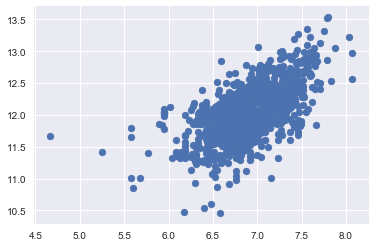

In [44]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]

plt.scatter(tmp[tmp['TotalBsmtSF']>0]['TotalBsmtSF'], tmp[tmp['TotalBsmtSF']>0]['SalePrice'])

## 三.模型选择

### 1.数据标准化

In [45]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]
tmp_1 = train_test[train_test['SalePrice'].isnull().values==True]

x_train = tmp[['OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
y_train = tmp[['SalePrice']].values.ravel()
x_test = tmp_1[['OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

In [46]:
#test
print(x_test[x_test.isnull().values==True].count())

OverallQual    2
GrLivArea      2
GarageCars     1
TotalBsmtSF    1
FullBath       2
YearBuilt      2
dtype: int64


In [47]:
# test2
x_test.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
1460,5,6.799056,1.0,6.783325,1,1961
1461,6,7.192934,1.0,7.192934,1,1958
1462,5,7.396335,2.0,6.834109,2,1997
1463,6,7.380879,2.0,6.831954,2,1998
1464,8,7.155396,2.0,7.155396,2,1992


In [48]:
# 简单测试，用中位数来替代
print(x_test.GarageCars.mean() ,x_test.GarageCars.median(),x_test.TotalBsmtSF.mean(), x_test.TotalBsmtSF.median())

#x_test.loc[:,'GarageCars'].fillna(x_test.GarageCars.median(), inplace=True)
#x_test.loc[:,'TotalBsmtSF'].fillna(x_test.TotalBsmtSF.median(), inplace=True)
x_test['GarageCars'].fillna(x_test.GarageCars.median(), inplace=True)
x_test['TotalBsmtSF'].fillna(x_test.TotalBsmtSF.median(), inplace=True)

1.7661179698216736 2.0 6.715696483723735 6.8966943316227125


F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### 2.开始建模
- 可选单个模型模型有 线性回归（Ridge、Lasso）、树回归、GBDT、XGBoost、LightGBM 等.
- 也可以将多个模型组合起来,进行模型融合,比如voting,stacking等方法
- 好的特征决定模型上限,好的模型和参数可以无线逼近上限.
- 我测试了多种模型,模型结果最高的随机森林,最高有0.8.
#### bagging:
单个分类器的效果真的是很有限。 我们会倾向于把N多的分类器合在一起，做一个“综合分类器”以达到最好的效果。 我们从刚刚的试验中得知，Ridge(alpha=15)给了我们最好的结果。

0.16647190708592544


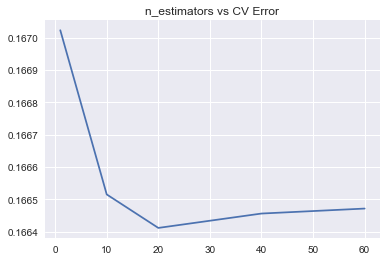

In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

ridge = Ridge(alpha=0.1)

# bagging 把很多小的分类器放在一起，每个train随机的一部分数据，然后把它们的最终结果综合起来（多数投票）
# bagging 算是一种算法框架
params = [1, 10, 20, 40, 60]
test_scores = []
for param in params:
    clf = BaggingRegressor(base_estimator=ridge, n_estimators=param)
    # cv=5表示cross_val_score采用的是k-fold cross validation的方法，重复5次交叉验证
    # scoring='precision'、scoring='recall'、scoring='f1', scoring='neg_mean_squared_error' 方差值
    test_score = np.sqrt(-cross_val_score(clf, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

print(test_score.mean())
plt.plot(params, test_scores)
plt.title('n_estimators vs CV Error')
plt.show()

In [52]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
#kernel_ridge即使用核技巧的岭回归（L2正则线性回归）
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


#Validation function
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [53]:
#Score的方法为MSE，求出几个模型的Baseline
# 模型选择
## LASSO Regression :
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
# Elastic Net Regression
ENet = make_pipeline(
    RobustScaler(), ElasticNet(
        alpha=0.0005, l1_ratio=.9, random_state=3))
#Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
## Gradient Boosting Regression
GBoost = GradientBoostingRegressor(
    n_estimators=3000,
    learning_rate=0.05,
    max_depth=4,
    max_features='sqrt',
    min_samples_leaf=15,
    min_samples_split=10,
    loss='huber',
    random_state=5)
## XGboost
model_xgb = xgb.XGBRegressor(
    colsample_bytree=0.4603,
    gamma=0.0468,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=1.7817,
    n_estimators=2200,
    reg_alpha=0.4640,
    reg_lambda=0.8571,
    subsample=0.5213,
    silent=1,
    random_state=7,
    nthread=-1)
## lightGBM
model_lgb = lgb.LGBMRegressor(
    objective='regression',
    num_leaves=5,
    learning_rate=0.05,
    n_estimators=720,
    max_bin=55,
    bagging_fraction=0.8,
    bagging_freq=5,
    feature_fraction=0.2319,
    feature_fraction_seed=9,
    bagging_seed=9,
    min_data_in_leaf=6,
    min_sum_hessian_in_leaf=11)
## 对这些基本模型进行打分
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print(
    "Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(),
                                                          score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))




Lasso score: 0.1665 (0.0057)

ElasticNet score: 0.1665 (0.0057)

Kernel Ridge score: 0.1562 (0.0046)

Gradient Boosting score: 0.1642 (0.0091)

Xgboost score: 0.1560 (0.0057)

LGBM score: 0.1580 (0.0059)



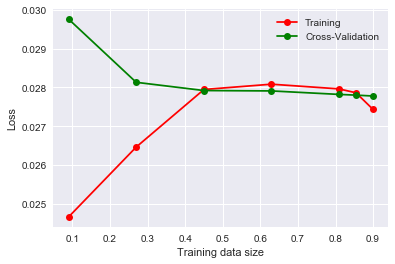

In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve


ridge = Ridge(alpha=0.1)

train_sizes, train_loss, test_loss = learning_curve(ridge, x_train, y_train, cv=10, 
                                                    scoring='neg_mean_squared_error',
                                                    train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9 , 0.95, 1])

# 训练误差均值
train_loss_mean = -np.mean(train_loss, axis = 1)
# 测试误差均值
test_loss_mean = -np.mean(test_loss, axis = 1)

# 绘制误差曲线
plt.plot(train_sizes/len(x_train), train_loss_mean, 'o-', color = 'r', label = 'Training')
plt.plot(train_sizes/len(x_train), test_loss_mean, 'o-', color = 'g', label = 'Cross-Validation')

plt.xlabel('Training data size')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

In [56]:
mode_br = BaggingRegressor(base_estimator=ridge, n_estimators=10)
mode_br.fit(x_train, y_train)
y_test = np.expm1(mode_br.predict(x_test))

# 四 建立模型

> 模型融合 voting

In [65]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# 模型融合
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]

        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self

    # Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack(
            [model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
   
    
#Average-Stacking,平均基本模型的Stacking方法
# 评价这四个模型的好坏
averaged_models = AveragingModels(models=(ENet, GBoost, KRR, lasso))
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(),
                                                              score.std()))


#Meta-model Stacking
# 最终对模型的训练和预测
# StackedRegressor
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

stacked_averaged_models.fit(x_train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(x_train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(x_test.values))
print(rmsle(y_train, stacked_train_pred))

# XGBoost
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = np.expm1(model_xgb.predict(x_test))
print(rmsle(y_train, xgb_train_pred))
# lightGBM
model_lgb.fit(x_train, y_train)
lgb_train_pred = model_lgb.predict(x_train)
lgb_pred = np.expm1(model_lgb.predict(x_test.values))
print(rmsle(y_train, lgb_train_pred))
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train, stacked_train_pred * 0.70 + xgb_train_pred * 0.15 +
            lgb_train_pred * 0.15))
# 模型融合的预测效果
ensemble = stacked_pred * 0.70 + xgb_pred * 0.15 + lgb_pred * 0.15
# 保存结果
test_ID = tmp_1['Id']
result = pd.DataFrame()
result['Id'] = test_ID
result['SalePrice'] = ensemble
# index=False 是用来除去行编号
result.to_csv('result.csv', index=False)

 Averaged base models score: 0.1554 (0.0055)

0.1288469957900956
0.12625268649283675
0.14613334895564534
RMSLE score on train data:
0.12936603523227072
